In [10]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Real_Combine_1.csv')
df.head()

T    TM    Tm  SLP     H   VV    V   VM      PM 2.5
0  23.4  30.3  19.0  0.0  59.0  6.3  4.3  5.4  284.795833
1  22.4  30.3  16.9  0.0  57.0  6.9  3.3  7.6  219.720833
2  24.0  31.8  16.9  0.0  51.0  6.9  2.8  5.4  182.187500
3  22.8  30.2  17.6  0.0  55.0  7.7  3.7  7.6  154.037500
4  23.1  30.6  17.4  0.0  46.0  6.9  3.3  5.4  223.208333

#### Using PANDAS PROFILING

In [33]:
import pandas_profiling as pp
pp.ProfileReport(df)

#### Using AUTOVIZ

In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (1122, 9)
Classifying variables in data set...
    9 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21
Could not draw Distribution Plot
No categorical or boolean vars in data set. Hence no bar charts.
Nothing to add Plot not being added
Time to run AutoViz (in seconds) = 1.254


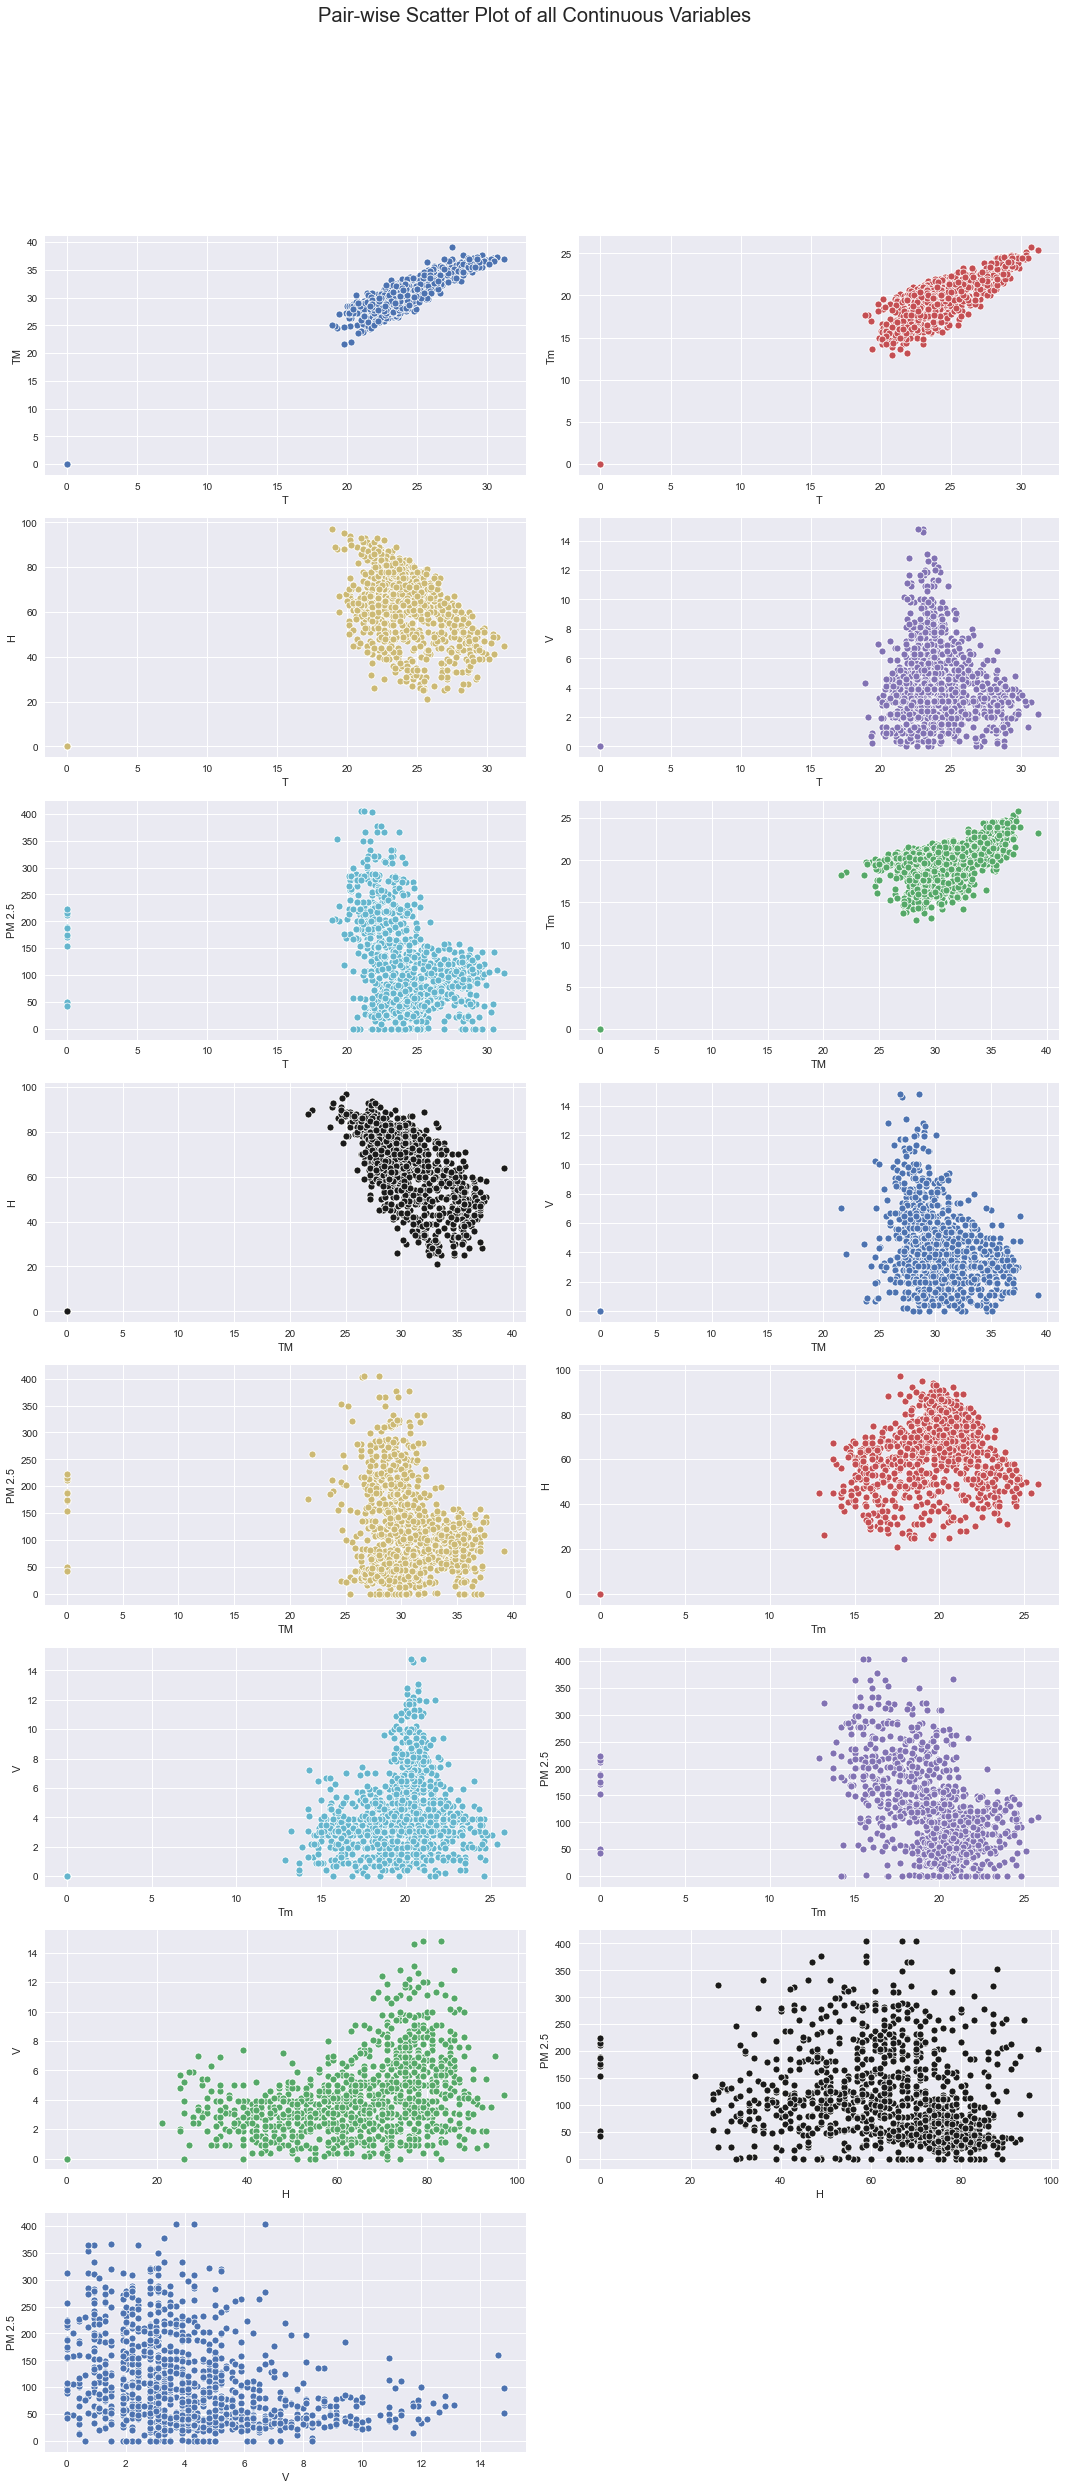

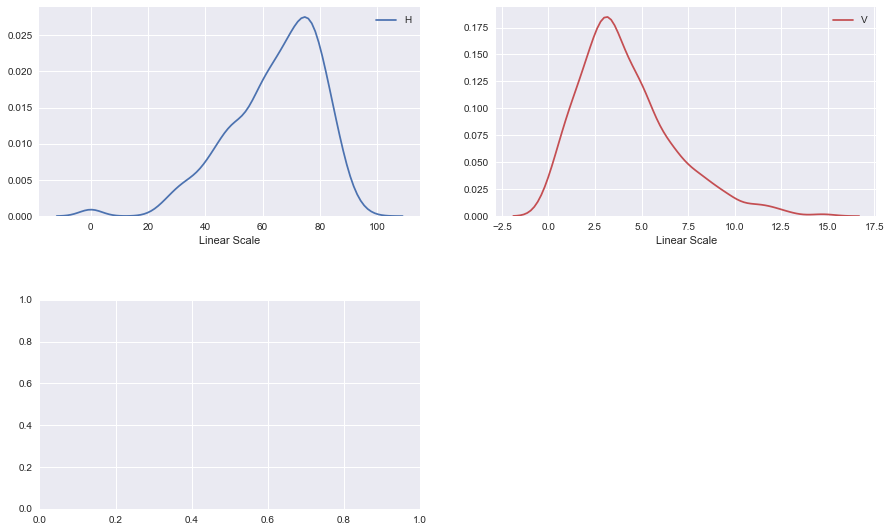

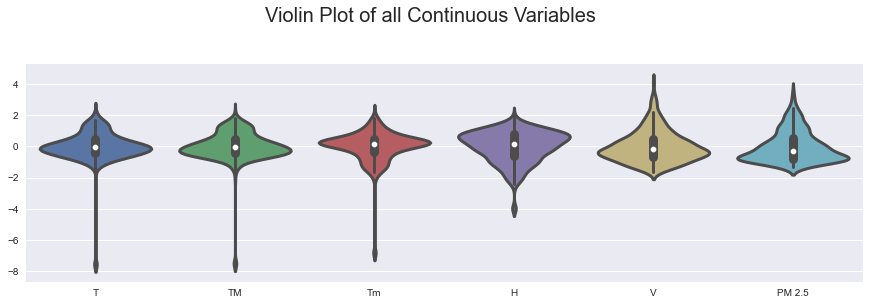

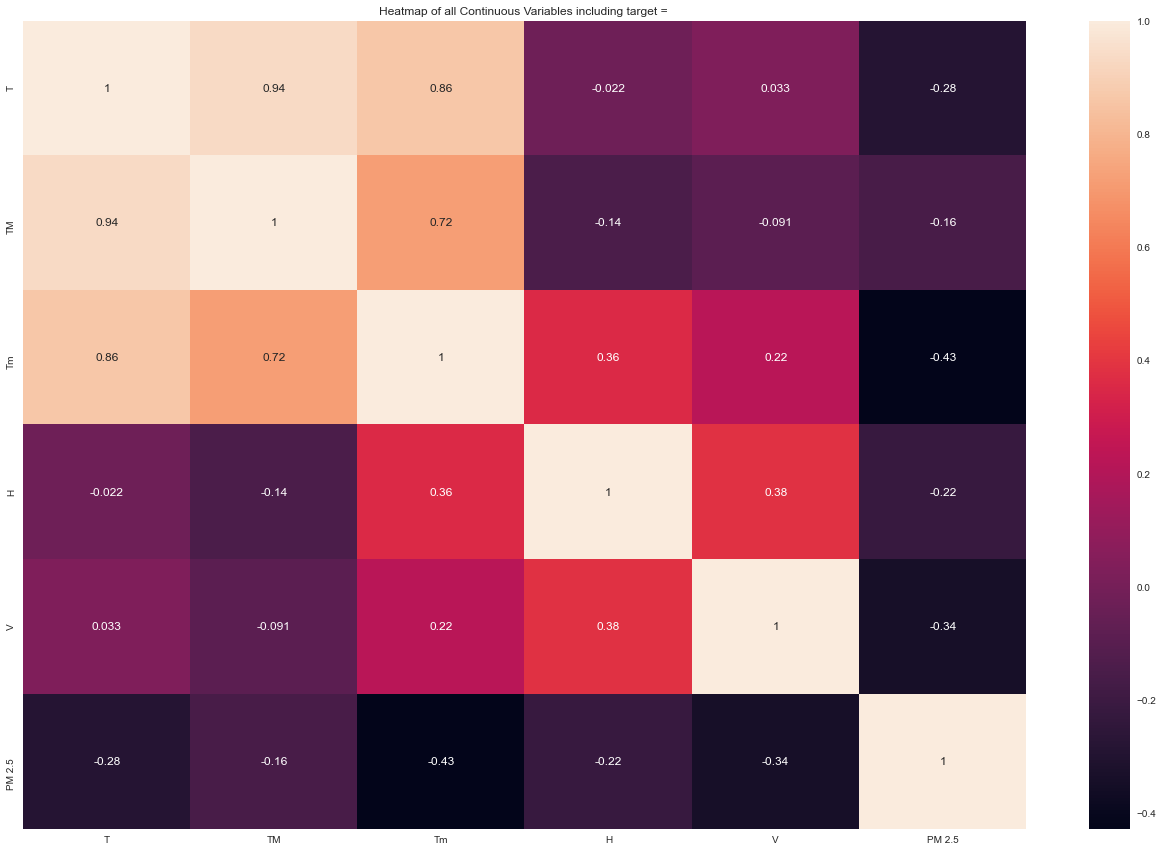

In [37]:
df = AV.AutoViz('Real_Combine_1.csv')

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

#### Trying Linear Regression just for comparison

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [8]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring = 'neg_mean_squared_error',cv = 5)
mse

array([-5226.40872558, -4457.74449839, -4689.67415854, -4784.70019996,
       -8711.0552873 ])

In [12]:
mean_mse = np.mean(mse)
mean_mse

-5573.916573956148

#### Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [16]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
             }
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 5)

In [17]:
ridge_regressor.fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.27957e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.28274e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.24554e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.43078e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.5831e-21): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [18]:
ridge_regressor.best_params_

{'alpha': 40}

In [19]:
ridge_regressor.best_score_# score improved a little bit compare to Linear regression(-5573.916573956148)

-5560.723346737781

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
             }
lasso_rigressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)
lasso_rigressor.fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036767.353371388, tolerance: 589.1491630577503
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2115245.6816364448, tolerance: 664.502905560971
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456976.3344474952, tolerance: 610.283820742174
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [22]:
print(lasso_rigressor.best_params_)
print(lasso_rigressor.best_score_)#Lasso performed even better than Ridge(-5560.723346737781)

{'alpha': 10}
-5507.486611641236


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
prediction = lasso_rigressor.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

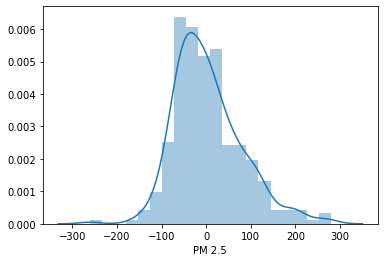

In [25]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [27]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

58.58784305245224

In [28]:
metrics.mean_squared_error(y_test,prediction)

5833.099509604842

In [29]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

76.37473083163594

In [31]:
#since LASSO regression gave us the best result, thus we will be making pickle file for lasso
import pickle
file = open('lasso_regression.pkl','wb')
pickle.dump(lasso_rigressor,file)